**Install Libraries**

In [1]:
!pip install transformers Pillow

**Import Libraries**

In [11]:
from transformers import pipeline
from IPython.display import HTML, display, Markdown
from PIL import Image
import base64
import io

def image_to_base64(image):
    """Convert PIL Image to base64."""
    buffered = io.BytesIO()
    image.save(buffered, format='JPEG')
    return base64.b64encode(buffered.getvalue()).decode()

def show_report(image):
    """Displays photo alongside bold highlighted story."""
    img_html = f'<img src="data:image/jpeg;base64,{image_to_base64(image)}" style="width:250px;height:auto;margin-right:20px;float:left;" />'
    story_html = f'<span style="font-size: 16px; color: #000">{story}</span>'
    display(HTML(f'<div>{img_html}</div>'))

**Upload your photo**

In [3]:
image = Image.open("/content/OIP.jpg")
image.show()

**Transform caption into a story**

In [5]:
caption_pipeline = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [6]:
story_pipeline = pipeline("text2text-generation", model="google/flan-t5-large")

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


**Generated story: A woman in a dress stands in a forest.**


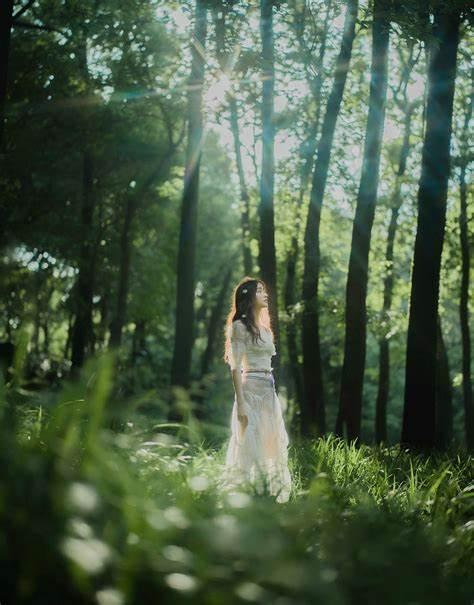

In [13]:
caption = caption_pipeline(image)[0]['generated_text']

prompt = f"Write a short story based on this description: {caption}"

story = story_pipeline(prompt, max_new_tokens=100)[0]['generated_text']
#bold_highlight(f"Generated story: {story}")
display(Markdown(f"**Generated story: {story}**"))
show_report(image)